<a href="https://colab.research.google.com/github/LlakmalGamage/Commercial-Bank-Stock-Prediction-Using-LSTM-Deep-Learning-Mini-Project-02/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


C:\Users\USER\AppData\Local\Temp\ipykernel_9988\85840443.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


importing data

*if you want to import from google drive*,

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

commercial_path='/content/drive/My Drive/path to dataset'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
data_set_1=df=pd.read_csv("COMB_Historical_Data.csv")


In [ ]:
data_set_1.tail(10)


,Date,Price,Open,High,Low,Vol.,Change %
3465,07/22/2009,34.42,34.54,34.54,34.11,588.46K,1.09%
3466,07/21/2009,34.05,33.56,34.05,33.56,299.50K,2.41%
3467,07/20/2009,33.25,33.06,33.31,32.82,256.14K,1.50%
3468,07/17/2009,32.76,32.63,32.82,32.63,638.31K,0.21%
3469,07/16/2009,32.69,32.63,32.82,32.63,222.09K,0.00%
3470,07/15/2009,32.69,32.08,32.82,32.08,6.62M,1.90%
3471,07/14/2009,32.08,31.58,32.08,31.58,74.17K,1.78%
3472,07/13/2009,31.52,31.83,32.02,31.46,55.12K,-1.16%
3473,07/09/2009,31.89,32.08,32.08,31.21,511.87K,-0.96%
3474,07/08/2009,32.20,32.57,32.69,32.20,64.84K,-1.14%


In [ ]:
#close values dataset for commercial bank

closed_dataset_1=data_set_1.reset_index()['Price']
closed_dataset_2=closed_dataset_1
# plt.plot(closed_dataset_1)
print(closed_dataset_2)



0       91.00
1       89.90
2       89.50
3       88.60
4       89.50
        ...  
3470    32.69
3471    32.08
3472    31.52
3473    31.89
3474    32.20
Name: Price, Length: 3475, dtype: float64


In [ ]:
# train1,test1 = train_test_split(closed_dataset_2, test_size=0.2, random_state=42)
# plt.plot(train1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
closed_dataset_1_scaled=scaler.fit_transform(np.array(closed_dataset_1).reshape(-1,1))

print(closed_dataset_1_scaled)
# closed_dataset_1_scaled=closed_dataset_1_scaled.flatten()
# plt.plot(closed_dataset_1_scaled)

[[0.49303714]
 [0.4839191 ]
 [0.48060345]
 ...
 [0.        ]
 [0.00306698]
 [0.0056366 ]]


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(closed_dataset_1_scaled, test_size=0.2, random_state=42)



In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)


In [ ]:
time_step=120
X_train,Y_train=create_dataset(train,time_step)
X_test,Y_test=create_dataset(test,time_step)

In [ ]:
print(X_train)

[[0.36994363 0.39754642 0.59955239 ... 0.70681366 0.58670424 0.56100796]
 [0.39754642 0.59955239 0.4952752  ... 0.58670424 0.56100796 0.15127653]
 [0.59955239 0.4952752  0.52254642 ... 0.56100796 0.15127653 0.14190981]
 ...
 [0.15359748 0.69263926 0.1458057  ... 0.71427387 0.59159483 0.38718501]
 [0.69263926 0.1458057  0.39696618 ... 0.59159483 0.38718501 0.45125995]
 [0.1458057  0.39696618 0.69786141 ... 0.38718501 0.45125995 0.62433687]]


In [ ]:
print(X_test)

[[0.41105769 0.71883289 0.12624337 ... 0.57932692 0.3390252  0.29326923]
 [0.71883289 0.12624337 0.42448607 ... 0.3390252  0.29326923 0.73284151]
 [0.12624337 0.42448607 0.54550729 ... 0.29326923 0.73284151 0.24452918]
 ...
 [0.84068302 0.71949602 0.41528515 ... 0.5293435  0.46800398 0.45200597]
 [0.71949602 0.41528515 0.13171419 ... 0.46800398 0.45200597 0.40616711]
 [0.41528515 0.13171419 0.33231101 ... 0.45200597 0.40616711 0.29981764]]


In [ ]:
print(X_train.shape),print(X_test.shape),print(Y_test.shape)

(2659, 120)
(574, 120)
(574,)


(None, None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

print(X_train)



[[[0.36994363]
  [0.39754642]
  [0.59955239]
  ...
  [0.70681366]
  [0.58670424]
  [0.56100796]]

 [[0.39754642]
  [0.59955239]
  [0.4952752 ]
  ...
  [0.58670424]
  [0.56100796]
  [0.15127653]]

 [[0.59955239]
  [0.4952752 ]
  [0.52254642]
  ...
  [0.56100796]
  [0.15127653]
  [0.14190981]]

 ...

 [[0.15359748]
  [0.69263926]
  [0.1458057 ]
  ...
  [0.71427387]
  [0.59159483]
  [0.38718501]]

 [[0.69263926]
  [0.1458057 ]
  [0.39696618]
  ...
  [0.59159483]
  [0.38718501]
  [0.45125995]]

 [[0.1458057 ]
  [0.39696618]
  [0.69786141]
  ...
  [0.38718501]
  [0.45125995]
  [0.62433687]]]


In [ ]:

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(120, 1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))




c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 120, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,049 (1.29 MB)

 Trainable params: 338,049 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=600,batch_size=128,verbose=1)


Epoch 1/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - loss: 0.0435 - val_loss: 0.0417
Epoch 2/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - loss: 0.0447 - val_loss: 0.0421
Epoch 3/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 490ms/step - loss: 0.0448 - val_loss: 0.0418
Epoch 4/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 410ms/step - loss: 0.0439 - val_loss: 0.0415
Epoch 5/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step - loss: 0.0439 - val_loss: 0.0411
Epoch 6/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - loss: 0.0426 - val_loss: 0.0415
Epoch 7/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - loss: 0.0418 - val_loss: 0.0416
Epoch 8/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - loss: 0.0440 - val_loss: 0.0411
Epoch 9/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 446ms/step - loss: 0.0439 - val_loss: 0.0414
Epoch 10/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 528ms/step - loss: 0.0426 - val_loss: 0.0432
Epoch 11/600
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 485ms/step - loss: 0.0438 - val_loss: 0.0411
Epoch 12/600
21/21 ━━━━━━━━━━━━━━━━━━

In [ ]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)
print(train_prediction)

84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
[[0.11127366]
 [0.20787156]
 [0.4721044 ]
 ...
 [0.4796472 ]
 [0.56379265]
 [0.4100443 ]]


In [ ]:
train_prediction=scaler.inverse_transform(train_prediction)
test_prediction=scaler.inverse_transform(test_prediction)

print(train_prediction),print(len(train_prediction))

[[44.944057]
 [56.597626]
 [88.47468 ]
 ...
 [89.38464 ]
 [99.53594 ]
 [80.98775 ]]
2659


(None, None)

[[0.15127653]
 [0.14190981]
 [0.52188329]
 ...
 [0.45125995]
 [0.62433687]
 [0.27403846]]


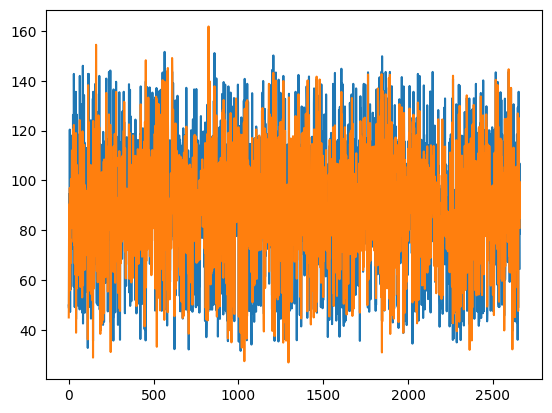

In [ ]:
# print(X_train)


# print(Y_train)
reshaped_data_single_feature = Y_train.reshape(-1, 1)
print(reshaped_data_single_feature)

y_train=scaler.inverse_transform(reshaped_data_single_feature)
plt.plot(y_train)
plt.plot(train_prediction)
# print(np.ndim(Y_train)),print(np.ndim(train_prediction))

In [ ]:

# train_prediction=train_prediction.flatten()
# plt.plot(train_prediction+closed_dataset_1.mean())

# test_prediction=test_prediction.flatten()
# plt.plot(test_prediction+closed_dataset_1.mean())


# plt.plot(closed_dataset_2+closed_dataset_1.mean())

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_prediction))

90.43744670596098

In [ ]:
 math.sqrt(mean_squared_error(Y_test,test_prediction))

94.21304691584531

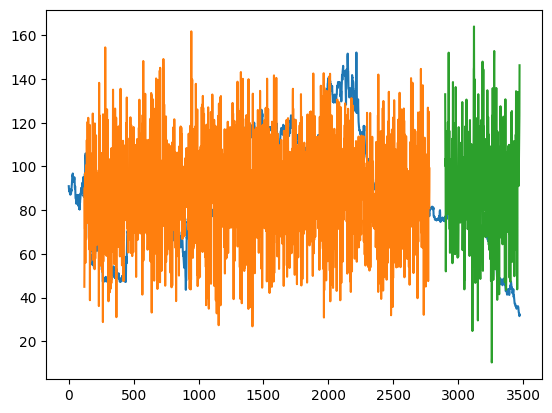

In [ ]:
look_back = 120

trainPredictPlot = np.empty_like(closed_dataset_1_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction) + look_back, :] = train_prediction

testPredictPlot = np.empty_like(closed_dataset_1_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction) + (look_back * 2) + 1:len(closed_dataset_1_scaled) - 1, :] = test_prediction

plt.plot(scaler.inverse_transform(closed_dataset_1_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test)

695

In [ ]:
x_input=test[595:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.7017876]
101
1 day input [0.37997347 0.48151525 0.58512931 0.45988064 0.62624337 0.30727785
 0.6751492  0.48740053 0.03680371 0.54111406 0.28556034 0.13759947
 0.3636439  0.31241711 0.18335544 0.70482427 0.70134284 0.72107095
 0.37665782 0.91445623 0.34706565 0.60659814 0.48740053 0.2878813
 0.68103448 0.70482427 0.37226459 0.56125663 0.31092507 0.6817805
 0.50041446 0.34963528 0.21037798 0.40459218 0.15359748 0.40077918
 0.71742374 0.55412798 0.32650862 0.63975464 0.48085212 0.13403515
 0.40517241 0.55760942 0.53498011 0.17796751 0.21369363 0.68708554
 0.50314987 0.81001326 0.40459218 0.16926393 0.23367042 0.37599469
 0.94877321 0.42100464 0.67506631 0.48806366 0.35369695 0.36596485
 0.51674403 0.46816976 0.61604775 0.39738064 0.46477122 0.36472149
 0.34888926 0.45200597 0.41752321 0.28945623 0.46676061 0.33595822
 0.51732427 0.18219496 0.37226459 0.61729111 0.9156996  0.38536141
 0.51732427 0.36787135 0.39182692 0.41105769 0.40459218 0.39290451
 0.46858422 0.47977454 0.41371021 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

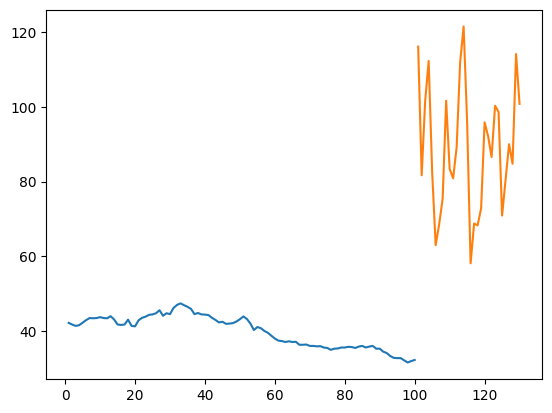

In [ ]:
plt.plot(day_new,scaler.inverse_transform(closed_dataset_1_scaled[3375:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


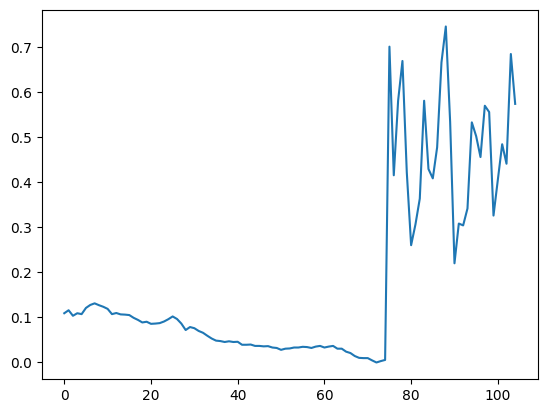

In [ ]:
df3=closed_dataset_1_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[3400:])

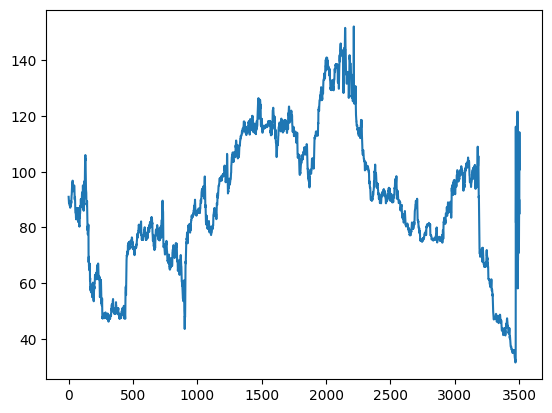

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)